# [03] 평가 

: 성능 평가

(주요 지표)

- 정확도(Accuracy)
- 정밀도(Precision)
- 재현율(Recall)

---

# **20230518**

## 01 정확도

: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표

정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [3]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd

In [4]:
titanic_df = pd.read_csv('../data/train.csv')

In [5]:
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

In [6]:
titanic_df = encode_features(titanic_df)

In [7]:
# Null 처리함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)

    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 앞에서 설정한 데이터전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [8]:
class MyDummyClassifier(BaseEstimator):
    
    # fit() 메서드는 아무것도  학습하지 않음
    def fit(self, X, y=None):
        pass

    # predict() 메서드는 단순히 Sex피처가 1이면 0 아니면 1로 예측
    #                 X = 테스트데이터 -> 예측값도출
    def predict(self, X):
        # zeros : 0으로 채움(행,열)
        pred = np.zeros((X.shape[0],1)) # 0으로 초기화

        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
    
        return pred


In [9]:
titanic_df = pd.read_csv('../data/train.csv')

y_titanic_df = titanic_df['Survived']   #lable:실제답
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df) #전처리


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df
                                                    ,y_titanic_df
                                                    ,test_size=0.2
                                                    ,random_state=1)

In [10]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(accuracy_score(y_test,mypredictions))

0.776536312849162


In [11]:
from sklearn.datasets import load_digits

In [12]:
class MyFackeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(digits.data
                                                    ,y
                                                    ,random_state=11)

In [13]:
# 불균형한 레이블 데이터 분포도 확인
print(y_test.shape)
print(pd.Series(y_test).value_counts())

(450,)
0    405
1     45
Name: count, dtype: int64


In [14]:
fakeclf = MyFackeClassifier()
fakeclf.fit(X_train, y_train)

In [15]:
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test,fakepred))

0.9


## 02 오차 행렬(confusion matrix, 혼동행렬)

: 이진분류의 예측 오류가 얼마인지, 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

***오차행렬표***

|실제\예측|       Negative     |        Positive      |
|--------|:-------------------:|:--------------------:|
|Negative|TN<br>(True Negative)|FP<br>(False Positive)|
|Positive|FN<br>(False Negative)|TP<br>(True Positive)|


+) FP + FN = 오차

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- 정확도(accuray) = 예측 결과와 실제 값(원래 답)이 동일한 건수 / 전체 데이터수 

      = (TN + TP)/(TN + FP + FN + TP)

- 일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 **중점적** 으로 찾아야하는 매우 **적은 수의 결괏값에 Positive를 설정**해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 많다.

- 예를 들어 사기 행위 예측 모델에서는 사기행위가 Positive, 그렇지 않은 경우 Negative
- 질병과 같은 특별한 경우: 암이 양성일 경우 Positive

- 불균형한 이진분류 데이터 세트에서는 Positive데이터 건수가 매우 작기 때문에 데이터에 기반한 ML알고리즘은 **Positive보다는 Negative로 예측 정확도가 높아지는 경향**이 발생


## 03 정밀도와 재현율

: Positive 데이터세트의 예측 성능에 더 초점을 맞춘 평가 지표




ㅇ **정밀도** : ***예측***을 Positive로 한 대상중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 

```python        
        : 양성 예측도 or PPV(Posivie Predictive Value)
        
        = TP / (FP + TP)
```




ㅇ **재현율** : ***실제*** 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

```python        
        : 민감도(Sensitivity) or TPR(True Positive Rate)
        
        = TP / (FN + TP)
```

ㅇ 정밀도/재현율의 중요도

- 정밀도(FP)가 더 중요 : 스팸메일(Positive) 분류

- 재현율(FN)이 더 중요 : 질병예측, 보험/금융 사기 적발 예측

: 'FP + FN = 오차' 로 고정되어있음 ~ ***정밀도와 재현율은 상충***되어 있는 값

! FP, FN 둘 다 작을 수록 좋음 => 오차가 작을 수록 좋음


- 불균형 데이터세트에서는 TP를 높이는 것에 집중 <- Positive가 작기때문

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print('오차행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
titanic_df = pd.read_csv('../data/train.csv')


y_titanic_df = titanic_df['Survived']   #lable:실제답
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df) #전처리


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df
                                                    ,y_titanic_df
                                                    ,test_size=0.2
                                                    ,random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


- 정확도 : 108 + 47 / 108 + 14 + 10 + 47
- 정밀도 : 47 / 10 + 47
- 재현율 : 47 / 14 + 47

<br>

- FN : 1종 오류, FP : 2종 오류

### O 정밀도/재현율 트레이드 오프 (상충)

- 결정 임곗값(Threshold) 을 조정해 정밀도 또는 재현율의 수치를 올릴 수 잇다.

#### ㅇ ***predict_proba()***

:개별 데이터 별로 **예측 확률** 반환하는 메서드

In [20]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(pred_proba.shape)
print(pred_proba[:3])
# [[0일 확률 1일 확률]
#   [ ]]

(179, 2)
[[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]


```python
[[0.44935226 0.55064774]    --> 좋지 않은 결과를 내는 경우
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]
```

In [21]:
pred_proba_result = np.concatenate([pred_proba
                                    , pred.reshape(-1,1)],axis=1)
print(pred_proba_result[:3])

# 두개의 class 중에서 더 큰 확률을 클래스값으로 예측
# [[0일 확률 1일 확률 예측결과]
#   [ ]]

[[0.44935226 0.55064774 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429644 0.13570356 0.        ]]


In [22]:
from sklearn.preprocessing import Binarizer

In [23]:
X = [[1,-1,2],
     [2,0,0,],
     [0,1.1,1.2]]

# threshold보다 같거나 작으면 0, 크면 1
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [24]:
# Binarizer의 threshold 설정값(분류 결정 임곗값)
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 커럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binerizer 적용
# 2차원 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [25]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [26]:
# 테스트 수행 할 모든 임계값
threscholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation수행
    for custom_threshold in threscholds:
        binariser = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)

        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), threscholds)

임계값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.45
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.5
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.55
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.6
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [28]:
from sklearn.metrics import precision_recall_curve

In [29]:
# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 presision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 인덱스 10개', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('정밀도:',np.round(precisions[thr_index],3))
print('정밀도:',np.round(recalls[thr_index],3))


반환 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 인덱스 10개 [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
정밀도: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [32]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


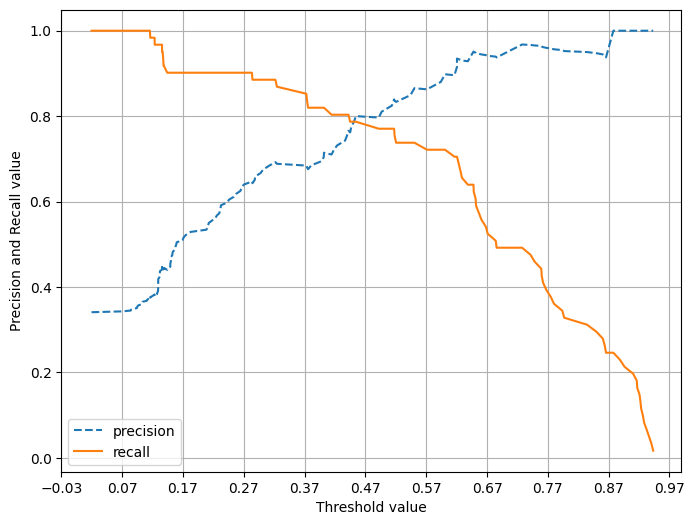

In [33]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### O 정밀도와 재현율의 맹점

- 정밀도가 100%가 되는 방법

        : FP = 0

- 재현율이 100%가 되는 방법

        : FN = 0

## 04 F1 스코어

$$F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 * \frac{precision * recall}{precision + recall}$$ 

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
f1

0.7966101694915254

In [37]:

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    

    print('오차행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:4f}'.format(accuracy,precision,recall,f1))

In [38]:
thredsholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.757576
임계값: 0.45
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.757576
임계값: 0.5
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.757576
임계값: 0.55
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.757576
임계값: 0.6
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.757576


## 05 ROC 곡선과 AUC

In [39]:
from sklearn.metrics import roc_curve

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.plot([0,1],[0,1],'k--',label='Random')

    strart, end = plt.xlim(
        
    )

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:

def get_clf_eval(y_test, pred=None, pred_preoba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_preoba)

    print('오차행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:4f}, AUC: {4:4f}'.format(accuracy,precision,recall,f1,roc_auc))

## 06 피마 인디언 당뇨병 예측

- 문제정의

: 당뇨병 여부를 판단 => 이진분류

### O 구성 피처

```python
- Pregrancies               : 임신 횟수
- Glucose                   : 포도당 부하 검사 수치
- BloodPressure             : 혈압(mm Hg)
- SkinThinkness             : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin                   : 혈청 인슐린(mu U/ml)
- BMI                       : 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction  : 당뇨 내력 가중치 값
- Age                       : 나이
- Outcome                   : 클래스 결정값(0 또는 1:positive) = label
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %precision

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_data = pd.read_csv('../data/diabetes.csv')

# 레이블의 불균형성 확인
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.drop('Outcome',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
print(768*0.8, 614*0.65, 614*0.35)

614.4000000000001 399.1 214.89999999999998


In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,test_size=0.2
                                                    ,random_state=156
                                                    ,stratify=y)

### O 로지스틱 회귀

In [ ]:
# 로지스틱 회귀로 학습, 예측 및 평가 수행

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)        # 모델생성
pred = lr_clf.predict(X_test)       # 모델로 예측값 뽑음
pred_proba = lr_clf.predict_proba(X_test)[:,1]  # positive 확률 구하기

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.646465, AUC: 0.808333


In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


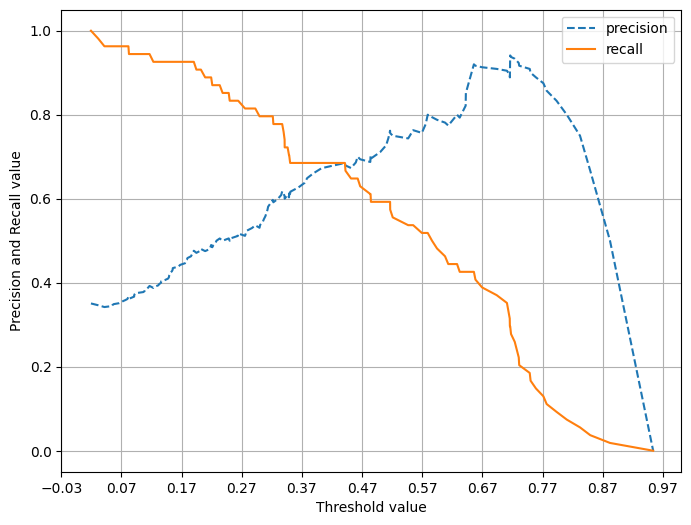

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

#### 서영아 화이팅
- 공부하기 싫다